# Assignment 7 - Numpy and Matplotlib
### Due Monday July 27

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` in a new folder named `assignment_7`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [4]:
import numpy as np


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [5]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/dant/.wget-hsts'. HSTS will be disabled.
--2020-07-28 01:21:32--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2020-07-28 01:21:33--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144032 (141K)
Saving to: ‘argo_float_4901412.npz’

argo_float_4901412. 100%[===================>] 140.66K   513KB/s    in 0.3s    

2020-07-28 01:21:34 (513 KB/s) - ‘argo_float_4901412.npz’ saved [144032/144032]



#### 1.3 Load the data file

In [6]:
data = np.load('argo_float_4901412.npz')
list(data)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [7]:
T= np.ma.masked_invalid(data['T'])
S= np.ma.masked_invalid(data['S'])
P= np.ma.masked_invalid(data['P'])

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [8]:
lat= (data['lat'])
lon= (data['lon'])
levels= (data['levels'])
date= (data['date'])

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [9]:
T.shape, S.shape, P.shape,levels.shape

((78, 75), (78, 75), (78, 75), (78,))

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [10]:
from matplotlib import pyplot as plt

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

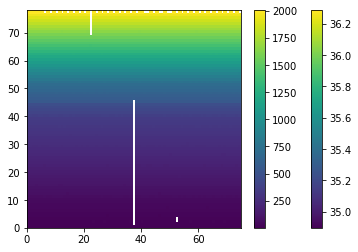

In [12]:
plt.pcolormesh(S)
plt.gca().invert_yaxis()
plt.colorbar(),
plt.pcolormesh(P)
plt.gca().invert_yaxis()
plt.colorbar()

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [28]:
Tm= T.mean()
Sm= S.mean()
Pm= P.mean()
Tm,Sm,Pm, np.std(T),np.std(S),np.std(P)

(11.104955983298781,
 35.53375800851532,
 617.7636946613931,
 4.660526903885564,
 0.39617465005493235,
 586.4118096127003)

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

Now time how long it takes for n = 1000